In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-marks/StudentsPerformance.csv


In [81]:
import seaborn as sns
import matplotlib.pyplot as  plt
sns.set_style('darkgrid')

In [82]:
df = pd.read_csv('/kaggle/input/student-marks/StudentsPerformance.csv')

In [83]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [84]:
# we dont need individual columns for math score , reading score, writing score . We will create one more column with the values average of these three columns.

In [85]:
df.shape

(1000, 8)

In [86]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [87]:
df['mean score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1).round()

In [88]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [89]:
#now explore number of females and number of males in the class
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

# lots of values  are in string format , Now we convert them into numericals this process is called numerical encoding

In [90]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['race/ethnicity'] = label_encoder.fit_transform(df['race/ethnicity'])
df['parental level of education'] = label_encoder.fit_transform(df['parental level of education'])
df['lunch'] = label_encoder.fit_transform(df['lunch'])
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


# Analysing Gender and Race

'\n1 represents male \n0 represents female\n'

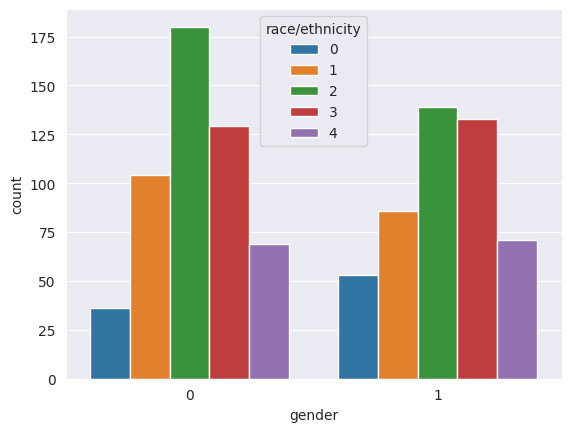

In [91]:
sns.countplot(x='gender', hue='race/ethnicity', data=df)
"""
1 represents male 
0 represents female
"""

# Analysing Test Preparation Column

In [92]:
df['test preparation course'].value_counts()

test preparation course
1    642
0    358
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7e1895a117b0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'Not Completed'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

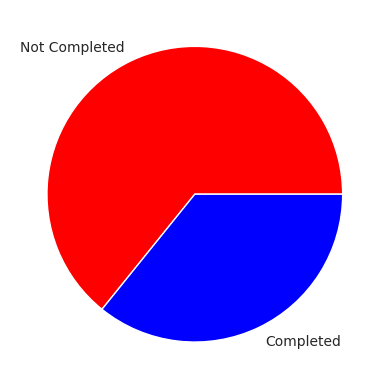

In [93]:
# Now we plot pie chart according  to the course comletion or not

labels = ['Not Completed','Completed']
colors = ['red', 'blue']
plt.pie(df['test preparation course'].value_counts(), labels = labels , colors =colors)

<Axes: xlabel='test preparation course', ylabel='mean score'>

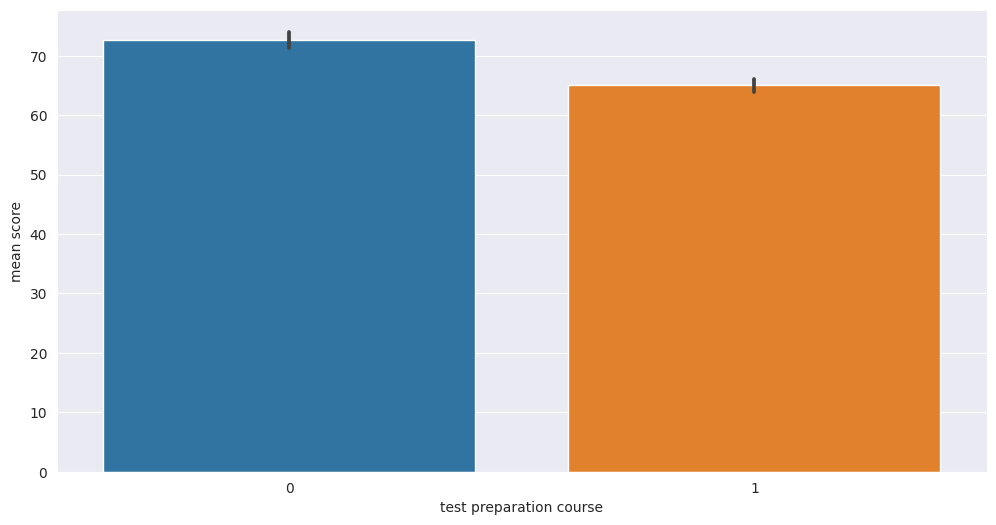

In [94]:
# now we visualize mean score , so that we can get an idea about who is getting good mean score . whether the people who completed the course got good marks or people haven't completed the course got good marks
plt.figure(figsize=(12,6))
sns.barplot(x='test preparation course', y = 'mean score', data = df)

# Analysing Lunch

<Axes: xlabel='lunch', ylabel='mean score'>

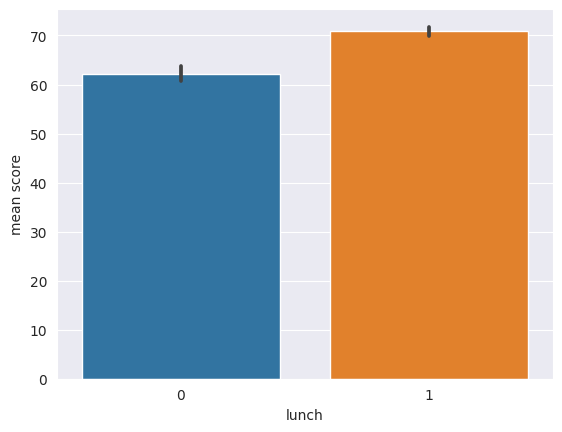

In [95]:
sns.barplot (x=df['lunch'], y = df['mean score'])
# 0- free lunch
# 1 - tiffen

<Axes: xlabel='parental level of education', ylabel='mean score'>

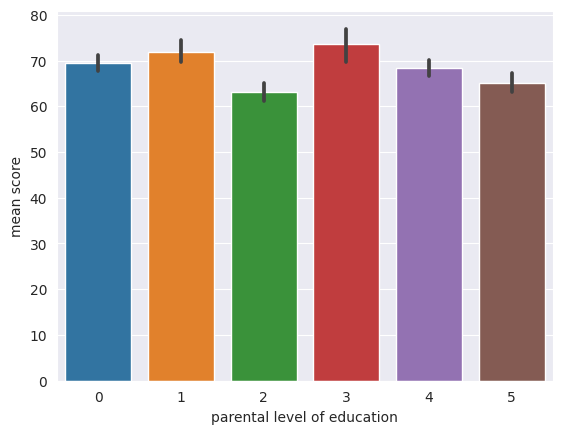

In [96]:
# Analysing Parental Level of education
sns.barplot(x = 'parental level of education', y = 'mean score', data=df)

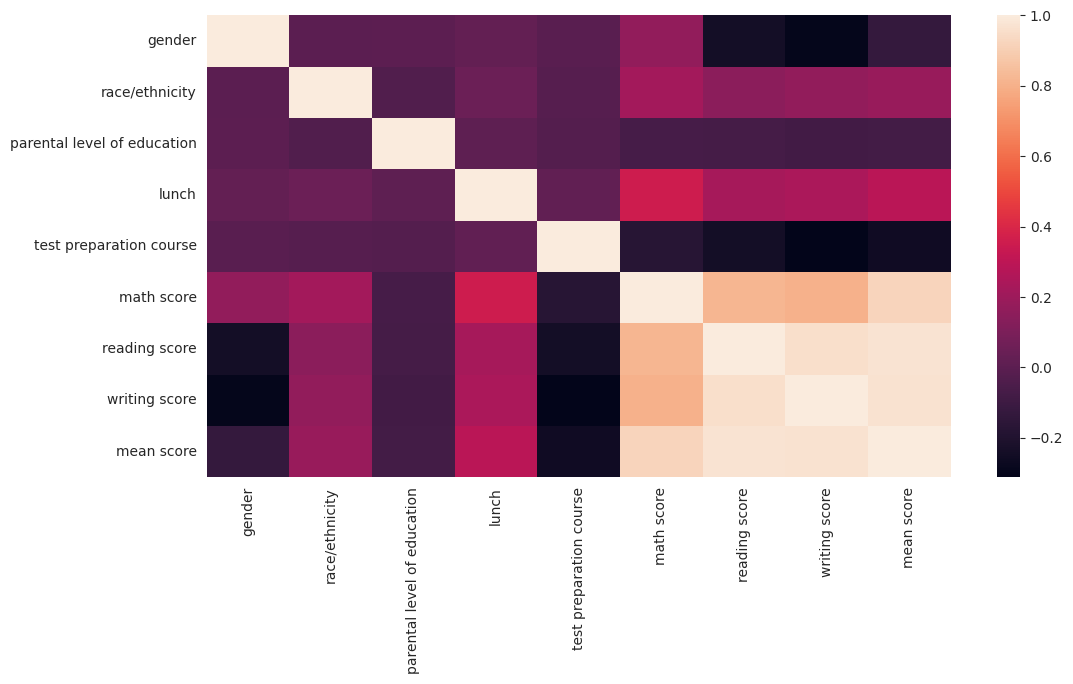

In [97]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())
plt.show()

In [98]:
#Data Preprocessing
df = df.drop(['math score', 'writing score', 'reading score'], axis = 1)

In [100]:
from sklearn.model_selection import train_test_split
y = df['mean score']
x = df.drop(['mean score'], axis =1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# Model Building

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [106]:
model.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [107]:
predictions = model.predict(x_test)

In [108]:
predictions

array([69., 56., 56., 59., 73., 76., 67., 71., 76., 69., 73., 54., 69.,
       71., 76., 54., 68., 74., 62., 49., 73., 69., 67., 68., 71., 56.,
       55., 68., 54., 74., 59., 76., 67., 73., 76., 71., 74., 68., 92.,
       69., 73., 56., 68., 75., 65., 92., 73., 65., 74., 54., 71., 55.,
       65., 68., 71., 69., 69., 69., 76., 69., 71., 74., 76., 71., 73.,
       58., 69., 73., 76., 68., 71., 71., 71., 75., 71., 71., 69., 69.,
       73., 73., 76., 69., 87., 73., 79., 69., 71., 92., 76., 54., 54.,
       73., 54., 55., 69., 68., 59., 54., 56., 68., 76., 71., 61., 50.,
       71., 75., 76., 65., 69., 79., 74., 75., 69., 59., 74., 74., 76.,
       59., 56., 76., 69., 65., 74., 68., 71., 76., 73., 76., 76., 74.,
       79., 73., 59., 69., 76., 69., 71., 69., 69., 73., 71., 73., 73.,
       68., 65., 59., 59., 59., 76., 69., 68., 74., 74., 71., 74., 69.,
       71., 73., 69., 68., 74., 69., 59., 71., 76., 73., 76., 68., 69.,
       73., 69., 71., 65., 75., 73., 69., 69., 73., 87., 73., 68

In [109]:
y_test

993    69.0
859    77.0
298    45.0
553    68.0
672    74.0
       ... 
679    61.0
722    84.0
215    81.0
653    70.0
150    66.0
Name: mean score, Length: 200, dtype: float64

In [111]:
difference = abs(predictions - y_test)

In [112]:
difference.mean()

11.03